<a href="https://colab.research.google.com/github/melder2/MLA_MRE/blob/main/FinalProject_Regression_MRE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Michael Elder**  

## Standard Imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook. 

In [ ]:
#example - you will replace this with the models you are actually using.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR

## Imports for Splitting Data and Building Pipeline


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [8]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/forestfires.csv')

In [ ]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


### Statistical and Visual Exploration

<Axes: ylabel='month'>

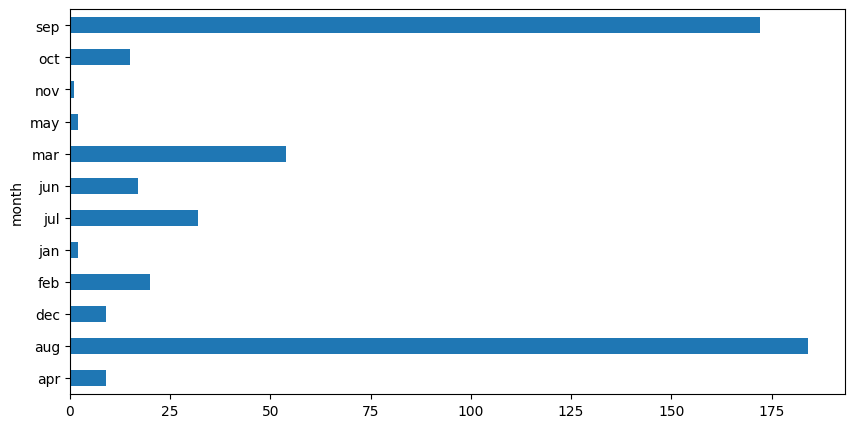

In [ ]:
month = df.month.groupby(df.month).count()
s = pd.Series(month)
s.plot(kind='barh', figsize=(10,5))

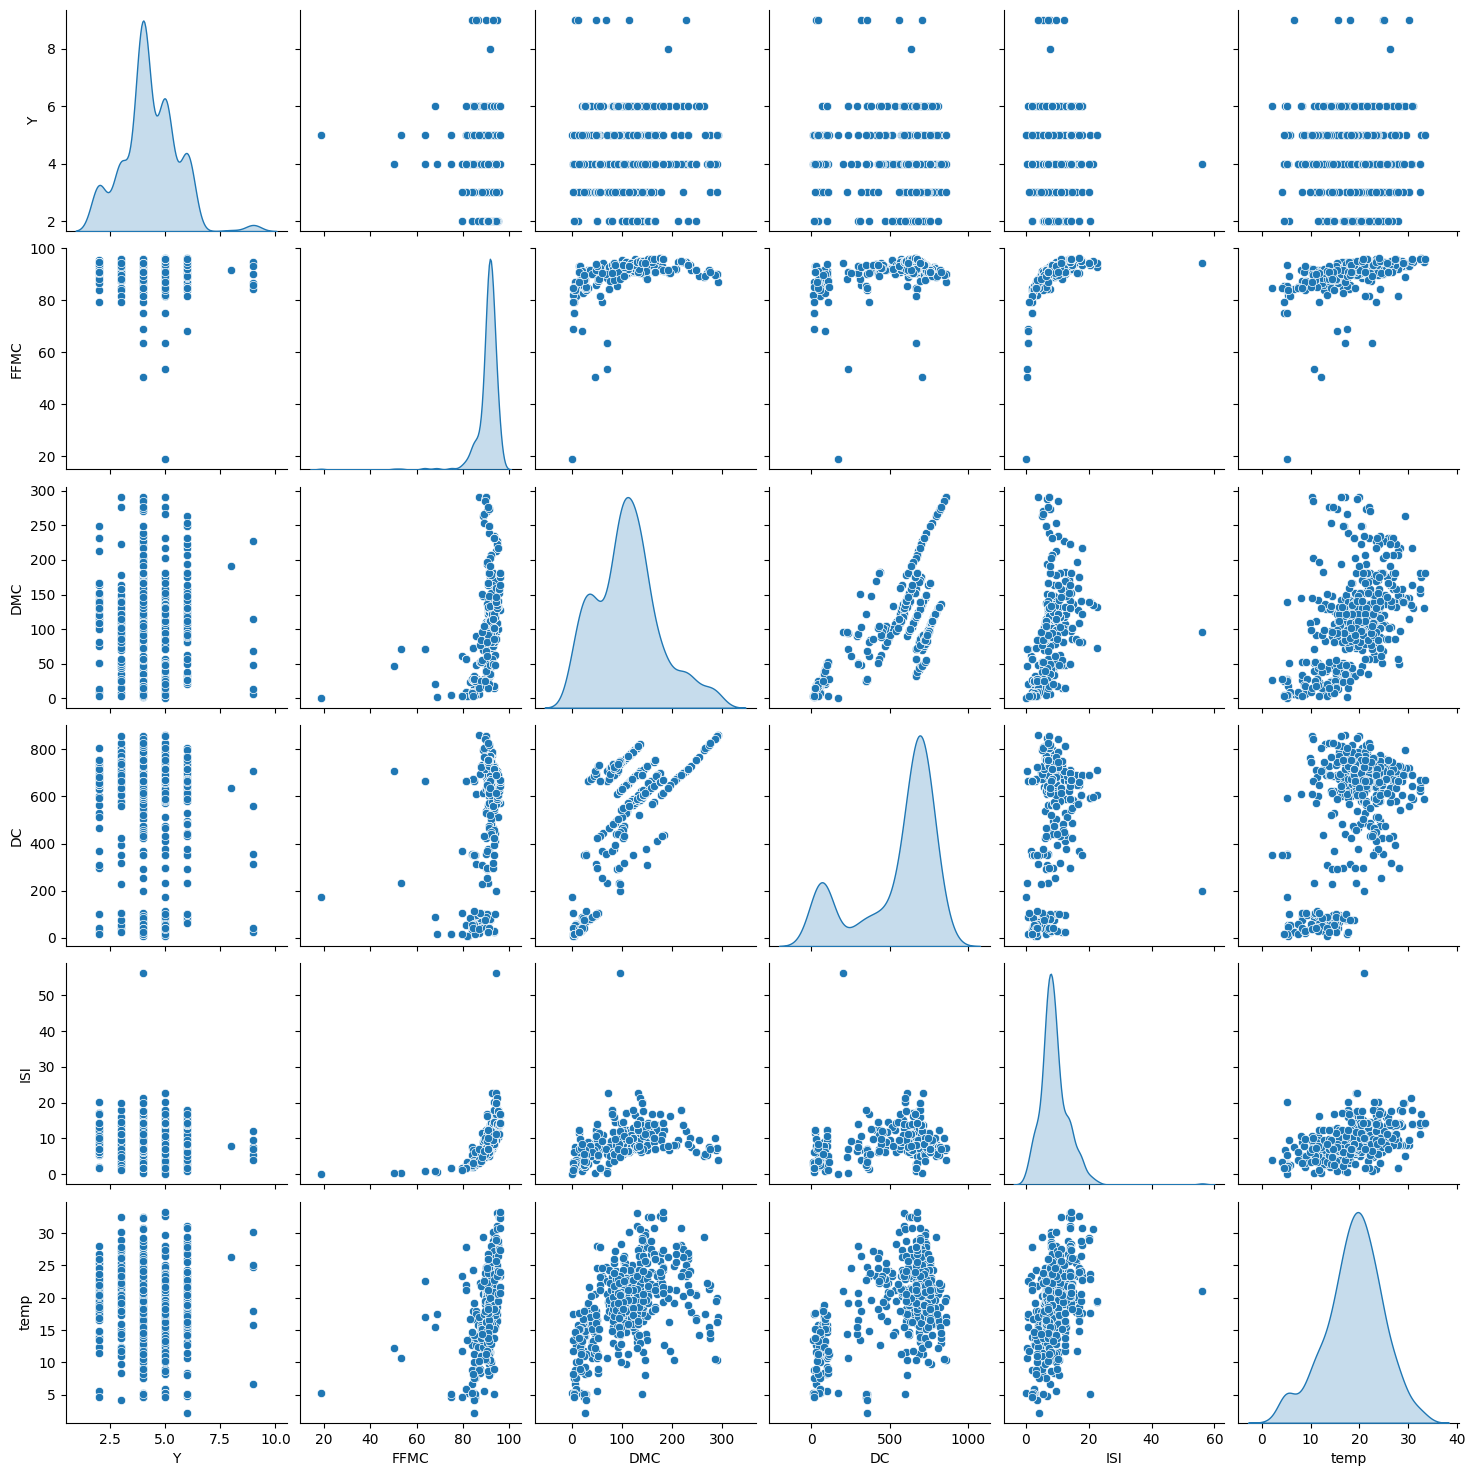

In [ ]:
sns.pairplot(data=df.iloc[:,1:-4], diag_kind='kde')

### Splitting Data into Train/Test

In [ ]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [ ]:
X = df[['X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain']]
y = df[['area']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

### Building the Pipeline

In [ ]:
num_attribs = ['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain']
cat_attribs = ['month','day']

In [ ]:
col_transform = ColumnTransformer(transformers=[
                                ('cat', OneHotEncoder(),cat_attribs),
                                ('num', MinMaxScaler(), num_attribs)
])

In [ ]:
pipeline = Pipeline([
    ('transform', col_transform),
    ('mlr_model', LinearRegression())
])

In [ ]:
set_config(display='diagram')
pipeline

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['month', 'day']),
                                                 ('num', MinMaxScaler(),
                                                  ['X', 'Y', 'FFMC', 'DMC',
                                                   'DC', 'ISI', 'temp', 'RH',
                                                   'wind', 'rain'])])),
                ('mlr_model', LinearRegression())])

### Executing the Model

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['month', 'day']),
                                                 ('num', MinMaxScaler(),
                                                  ['X', 'Y', 'FFMC', 'DMC',
                                                   'DC', 'ISI', 'temp', 'RH',
                                                   'wind', 'rain'])])),
                ('mlr_model', LinearRegression())])

### Evaluating Model

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
r2_score(y_test, y_pred)

0.011381843163912775

In [ ]:
pipeline.score(X_test, y_test)

0.011381843163912775

In [ ]:
pipeline.named_steps['mlr_model'].intercept_

array([3.20473448e+15])

In [ ]:
pipeline.named_steps['mlr_model'].coef_

array([[-1.30645999e+15, -1.30645999e+15, -1.30645999e+15,
        -1.30645999e+15, -1.30645999e+15, -1.30645999e+15,
        -1.30645999e+15, -1.30645999e+15, -1.30645999e+15,
        -1.30645999e+15, -1.30645999e+15, -1.30645999e+15,
        -1.89827449e+15, -1.89827449e+15, -1.89827449e+15,
        -1.89827449e+15, -1.89827449e+15, -1.89827449e+15,
        -1.89827449e+15,  1.03750000e+01,  6.42968750e+00,
        -3.64062500e+00,  4.90000000e+01, -5.95000000e+01,
        -6.10937500e+00,  2.60000000e+01, -8.46875000e+00,
         9.21875000e+00, -1.44160156e+01]])

### Conclusion
R2 and Pipeline Score are around 1% which means this model is not good at predicting area because the area results are skewed

## Problem 2

### Reading the Data

### Splitting Data into Train/Test

In [ ]:
X = df[['X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain']]
y = df[['area']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

### Building the Pipeline

In [ ]:
num_attribs = ['X','Y','FFMC','DMC','DC','ISI','temp','RH','wind','rain']
cat_attribs = ['month','day']

In [ ]:
col_transform = ColumnTransformer(transformers=[
                                ('cat', OneHotEncoder(),cat_attribs),
                                ('num', MinMaxScaler(), num_attribs)
])

In [ ]:
pipeline = Pipeline([
    ('transform', col_transform),
    ('SVCLinear', SVR(kernel="linear", C=75, max_iter=100000, epsilon=0.0))
    
])

In [ ]:
set_config(display='diagram')
pipeline

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['month', 'day']),
                                                 ('num', MinMaxScaler(),
                                                  ['X', 'Y', 'FFMC', 'DMC',
                                                   'DC', 'ISI', 'temp', 'RH',
                                                   'wind', 'rain'])])),
                ('SVCLinear',
                 SVR(C=75, epsilon=0.0, kernel='linear', max_iter=100000))])

### Executing the Model

In [ ]:
pipeline.fit(X_train, y_train.values.ravel())

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['month', 'day']),
                                                 ('num', MinMaxScaler(),
                                                  ['X', 'Y', 'FFMC', 'DMC',
                                                   'DC', 'ISI', 'temp', 'RH',
                                                   'wind', 'rain'])])),
                ('SVCLinear',
                 SVR(C=75, epsilon=0.0, kernel='linear', max_iter=100000))])

### Evaluating Model

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
print(mean_squared_error(y_test, y_pred)**0.5)

112.09987733841298


### Conclusion
Root Mean Squared Error is 112 which I would say is better than linear regression